## This notebook provides the reproduction of Fig. 5 in the paper: information in weights (IIW) with varying batch size.

In [1]:
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
import pdb
import os
from collections import defaultdict
from tqdm import tqdm
import torch.optim as optim
import torch.nn.functional as F
from torch import nn

from src.models import MLP
from src.dataset import load_data
from src.pib_utils import train
from src.utils import plot_info_acc, plot_info, train_track_info
from src.utils import img_preprocess, setup_seed, predict, eval_metric, feature_map_size

use_gpu = True if torch.cuda.is_available() else False
__fig_dir__ = './figure'
if not os.path.exists(__fig_dir__):
    os.makedirs(__fig_dir__)

In [2]:
__data_set__ = 'mnist'
x_tr, y_tr, x_va, y_va, x_te, y_te = load_data(__data_set__)
all_tr_idx = np.arange(len(x_tr))
num_class = np.unique(y_va).shape[0]
x_tr, y_tr = img_preprocess(x_tr, y_tr, use_gpu)
x_va, y_va = img_preprocess(x_va, y_va, use_gpu)
x_te, y_te = img_preprocess(x_te, y_te, use_gpu)
setup_seed(2020)
__layers__ = [512,]

load from MNIST
Extracting ./data\train-images-idx3-ubyte.gz
Extracting ./data\train-labels-idx1-ubyte.gz
Extracting ./data\t10k-images-idx3-ubyte.gz
Extracting ./data\t10k-labels-idx1-ubyte.gz


D:\PAC-Bayes IB\PAC-Bayes-IB\src\utils.py:23: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:180.)
  y = torch.LongTensor(y)


In [3]:
print(x_tr.shape)
info_bs_list = []
train_acc_bs_list = []
test_acc_bs_list = []
info_df_list = []
loss_acc_list_list = []

torch.Size([55000, 784])


In [4]:
print('###'*10)
print('batch size: 4')
print('###'*10)
model = MLP(num_class, 'relu', layers=__layers__)
if use_gpu:
    model.cuda()
model.use_gpu = use_gpu

# get prior on the validation set
train(model, np.arange(len(y_va)), x_va, y_va, x_va, y_va, num_epoch=10, batch_size=128, lr=1e-3, weight_decay=1e-5, early_stop_ckpt_path="./checkpoints/mlp_prior.pth",verbose=False)
w0_dict = dict()
for param in model.named_parameters():
    w0_dict[param[0]] = param[1].clone().detach() # detach but still on gpu
model.w0_dict = w0_dict
model._initialize_weights()
print("done get prior weights")

info_dict, loss_acc_list = train_track_info(model, all_tr_idx, x_tr, y_tr, x_va, y_va, 
                                            num_epoch=10,
                                            batch_size=4, 
                                            lr=1e-3,
                                            weight_decay=0,
                                            track_info_per_iter=100,
                                            verbose=False,)
print("finish training and tracking")
# plot_info_acc(info_dict, loss_acc_list, 'bs32', __fig_dir__)

# save info
df_info = pd.DataFrame(info_dict)
info_bs_list.append(df_info.mean(1).mean())
train_acc_bs_list.append(max(loss_acc_list['tr_acc']))
test_acc_bs_list.append(max(loss_acc_list['va_acc']))
info_df_list.append(df_info)
loss_acc_list_list.append(loss_acc_list)

##############################
batch size: 4
##############################


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  8.15it/s]


initialize model weights.
done get prior weights
finish training and tracking


In [5]:
print('###'*10)
print('batch size: 16')
print('###'*10)
model = MLP(num_class, 'relu', layers=__layers__)
if use_gpu:
    model.cuda()
model.use_gpu = use_gpu

# get prior on the validation set
train(model, np.arange(len(y_va)), x_va, y_va, x_va, y_va, num_epoch=10, batch_size=128, lr=1e-3, weight_decay=1e-5, early_stop_ckpt_path="./checkpoints/mlp_prior.pth",verbose=False)
w0_dict = dict()
for param in model.named_parameters():
    w0_dict[param[0]] = param[1].clone().detach() # detach but still on gpu
model.w0_dict = w0_dict
model._initialize_weights()
print("done get prior weights")

info_dict, loss_acc_list = train_track_info(model, all_tr_idx, x_tr, y_tr, x_va, y_va, 
                                            num_epoch=int((55000/4 * 10) / (55000/16)),
                                            batch_size=16, 
                                            lr=1e-3,
                                            weight_decay=0,
                                            track_info_per_iter=100,
                                            verbose=False,)
print("finish training and tracking")
# plot_info_acc(info_dict, loss_acc_list, 'bs128', __fig_dir__)

# save info
df_info = pd.DataFrame(info_dict)
info_bs_list.append(df_info.mean(1).mean())
train_acc_bs_list.append(max(loss_acc_list['tr_acc']))
test_acc_bs_list.append(max(loss_acc_list['va_acc']))
info_df_list.append(df_info)
loss_acc_list_list.append(loss_acc_list)

##############################
batch size: 16
##############################


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 15.86it/s]


initialize model weights.
done get prior weights
finish training and tracking


In [6]:
print('###'*10)
print('batch size: 64')
print('###'*10)
model = MLP(num_class, 'relu', layers=__layers__)
if use_gpu:
    model.cuda()
model.use_gpu = use_gpu

# get prior on the validation set
train(model, np.arange(len(y_va)), x_va, y_va, x_va, y_va, num_epoch=10, batch_size=128, lr=1e-3, weight_decay=1e-5, early_stop_ckpt_path="./checkpoints/mlp_prior.pth",verbose=False)
w0_dict = dict()
for param in model.named_parameters():
    w0_dict[param[0]] = param[1].clone().detach() # detach but still on gpu
model.w0_dict = w0_dict
model._initialize_weights()
print("done get prior weights")

info_dict, loss_acc_list = train_track_info(model, all_tr_idx, x_tr, y_tr, x_va, y_va, 
                                            num_epoch=int((55000/4 * 10) / (55000/64)),
                                            batch_size=64, 
                                            lr=1e-3,
                                            weight_decay=0,
                                            track_info_per_iter=100,
                                            verbose=False,)
print("finish training and tracking")
# plot_info_acc(info_dict, loss_acc_list, 'bs512', __fig_dir__)

# save info
df_info = pd.DataFrame(info_dict)
info_bs_list.append(df_info.mean(1).mean())
train_acc_bs_list.append(max(loss_acc_list['tr_acc']))
test_acc_bs_list.append(max(loss_acc_list['va_acc']))
info_df_list.append(df_info)
loss_acc_list_list.append(loss_acc_list)

##############################
batch size: 64
##############################


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 15.67it/s]


initialize model weights.
done get prior weights
finish training and tracking


In [7]:
print('###'*10)
print('batch size: 256')
print('###'*10)
model = MLP(num_class, 'relu', layers=__layers__)
if use_gpu:
    model.cuda()
model.use_gpu = use_gpu

# get prior on the validation set
train(model, np.arange(len(y_va)), x_va, y_va, x_va, y_va, num_epoch=10, batch_size=128, lr=1e-3, weight_decay=1e-5, early_stop_ckpt_path="./checkpoints/mlp_prior.pth",verbose=False)
w0_dict = dict()
for param in model.named_parameters():
    w0_dict[param[0]] = param[1].clone().detach() # detach but still on gpu
model.w0_dict = w0_dict
model._initialize_weights()
print("done get prior weights")

info_dict, loss_acc_list = train_track_info(model, all_tr_idx, x_tr, y_tr, x_va, y_va, 
                                            num_epoch=int((55000/4 * 10) / (55000/256)), # = (55000/32 * 10) / (55000/1024)
                                            batch_size=256,
                                            lr=1e-3,
                                            weight_decay=0,
                                            track_info_per_iter=100,
                                            verbose=False,)
print("finish training and tracking")
# plot_info_acc(info_dict, loss_acc_list, 'bs1024', __fig_dir__)

# save info
df_info = pd.DataFrame(info_dict)
info_bs_list.append(df_info.mean(1).mean())
train_acc_bs_list.append(max(loss_acc_list['tr_acc']))
test_acc_bs_list.append(max(loss_acc_list['va_acc']))
info_df_list.append(df_info)
loss_acc_list_list.append(loss_acc_list)

##############################
batch size: 256
##############################


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 15.84it/s]


initialize model weights.
done get prior weights
finish training and tracking


In [8]:
batch_size_list = [4, 16, 64, 256]
info_list = []
for i in range(4):
    best_va_idx = np.argmax(loss_acc_list_list[i]['va_acc'])
    best_iter = int(best_va_idx * 55000 / (batch_size_list[i]*100))
    info = info_df_list[i].iloc[best_iter-10:best_iter+10].mean(1).mean(0)
    info_list.append(info)

print('infomation in weights!')
print(info_list)

infomation in weights!
[7.810381202943972e-05, 6.223292584763839e-05, 8.20052286144346e-05, 8.663371609145543e-05]


In [9]:
acc_gap = [x-y for x,y in zip(train_acc_bs_list, test_acc_bs_list)]
print('last acc gap!')
print(acc_gap)

last acc gap!
[0.035345494747161865, 0.02954542636871338, 0.06040000915527344, 0.06300002336502075]


## plot the IIW against batch size

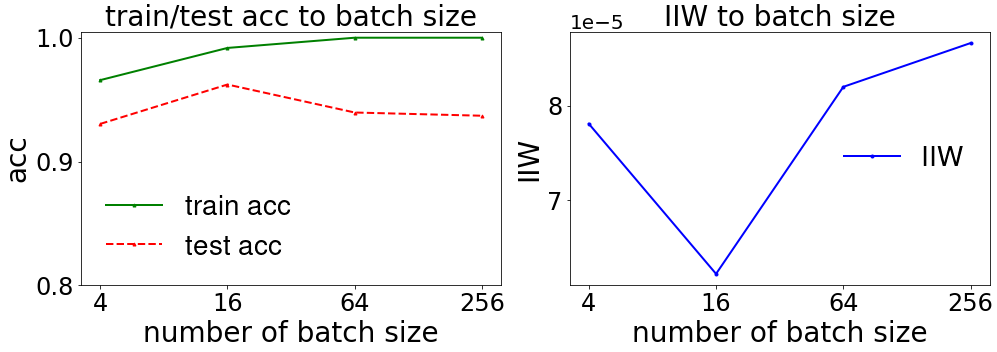

In [10]:
batch_size_list = ["4","16","64","256"]
figs, axs = plt.subplots(1,2,figsize=(14,5))
plt.style.use(['science','nature'])
ax = axs[0]
ax.plot(batch_size_list, train_acc_bs_list, label="train acc",color="green",marker="^", lw=2)
ax.plot(batch_size_list, test_acc_bs_list,label="test acc",color="red",marker="^",linestyle="--", lw=2)
ax.set_ylabel("acc",size=28)
ax.set_xlabel("number of batch size",size=28)
ax.legend(fontsize=28)
ax.set_title("train/test acc to batch size", size=28)
ax.tick_params(labelsize=24)
ax.set_ylim(0.8,1.005)
ax.set_yticks([0.8,0.9,1.0])

ax1 = axs[1]
lns1 = ax1.plot(batch_size_list, info_list, label="IIW",color="blue",marker="o", lw=2)
ax1.set_xlabel("number of batch size",size=28)
ax1.set_ylabel("IIW",size=28)
ax1.tick_params(labelsize=24)

ax1.yaxis.offsetText.set_fontsize(20)
ax1.yaxis.get_major_formatter().set_powerlimits((0,1))
lns = lns1
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc="center right", fontsize=28)
ax1.set_title("IIW to batch size", size=28)

plt.tight_layout()
plt.savefig(os.path.join(__fig_dir__,"info_batch_size.pdf"),bbox_inches = 'tight')
plt.show()

## We can see that when bs=16 the acc gap is the smallest. Simultaneously, the IIW gets to the bottom!